In [266]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data from CSV file
file_path = r'C:\Andre\consolidado.xlsx'
data = pd.read_excel(file_path)
#data = pd.read_excel('c:\andre\consolidado.xlsx', sheet_name='Sheet1')

# Assuming the last column is the target/output column
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)
x.head()
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [272]:
# Define the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(12), max_iter=100, activation='relu', solver='adam', random_state=42)

# Train the model
mlp_classifier.fit(X_train, y_train)

# Predict the labels for test set
y_pred = mlp_classifier.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[283   1   1]
 [  2 138   0]
 [  9   0 189]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       285
           2       0.99      0.99      0.99       140
           5       0.99      0.95      0.97       198

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623



c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp = MLPClassifier(random_state=42)

# Definir a grade de parâmetros para otimização
param_grid = {
    'hidden_layer_sizes': [(10,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['adaptive'],
    'max_iter': [50]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5, scoring='accuracy')

# Executar o ajuste de parâmetros
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e a melhor acurácia obtida
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor acurácia: {grid_search.best_score_:.2f}")

# Avaliar o modelo com os melhores parâmetros no conjunto de teste
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

C:\Users\Andre\AppData\Local\Temp\ipykernel_39016\125633374.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


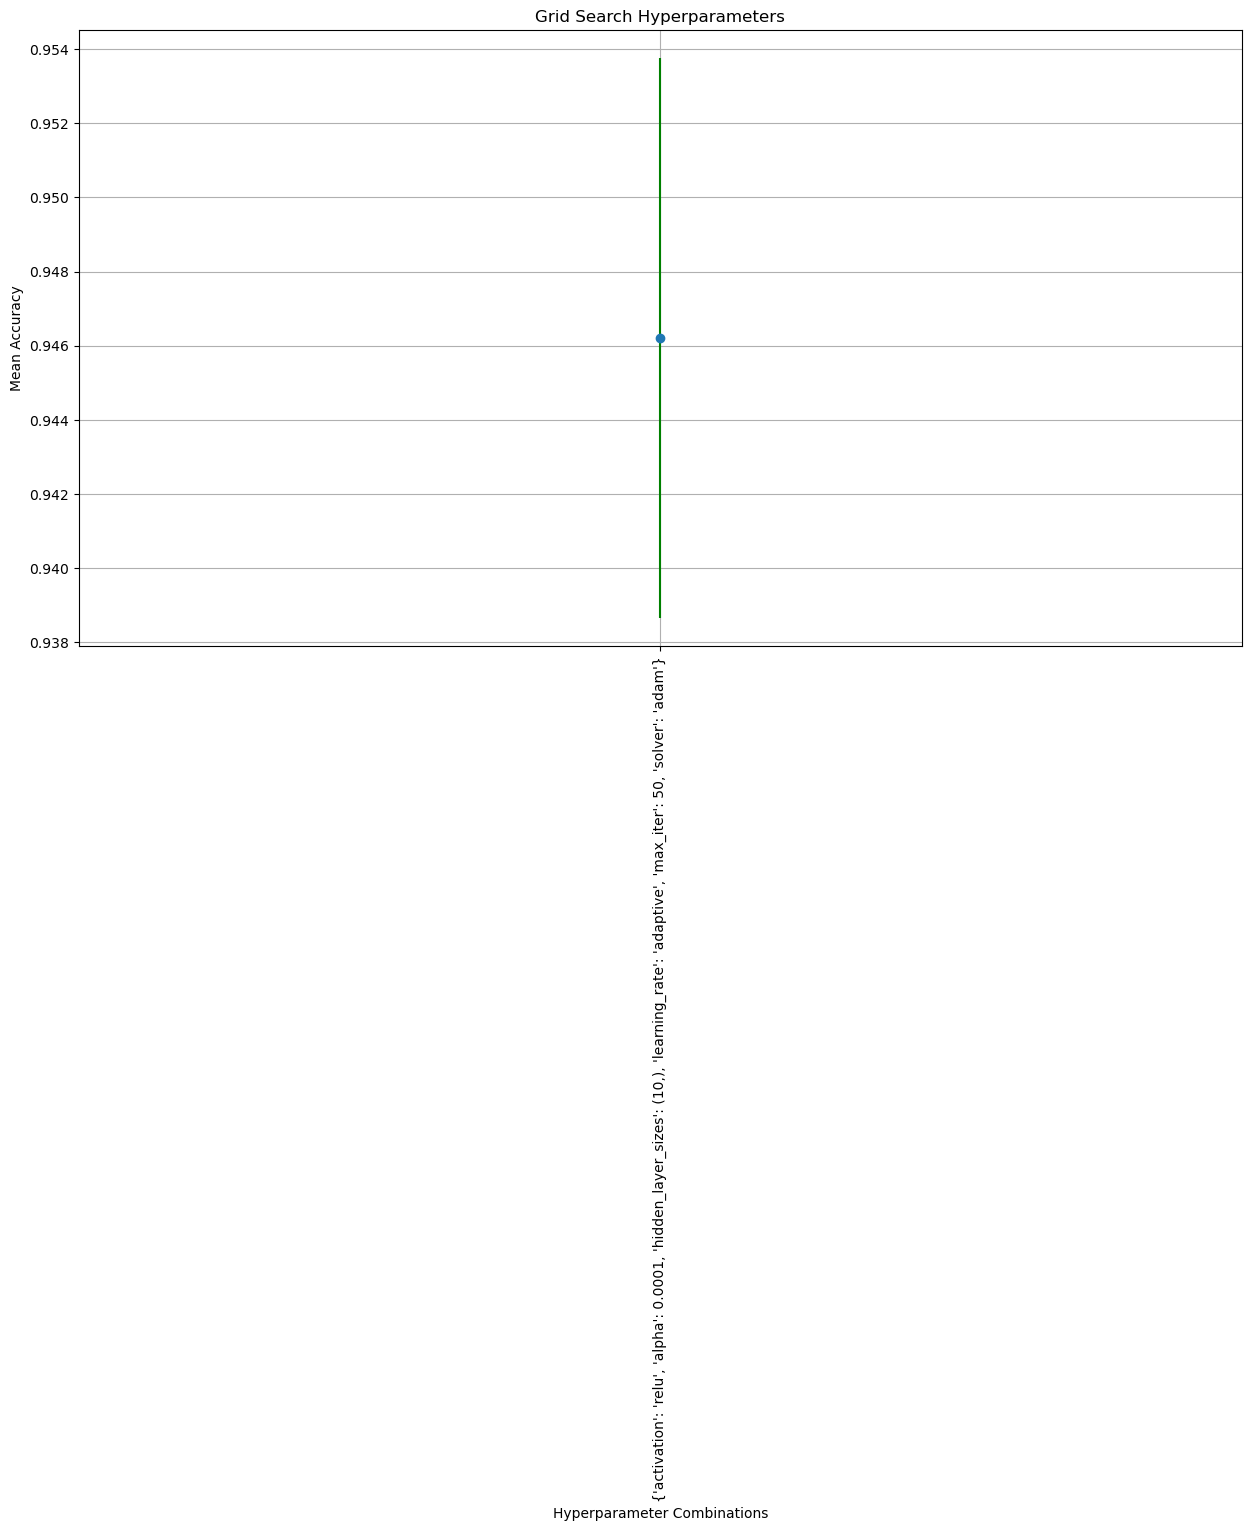

In [271]:
import matplotlib.pyplot as plt

# Extract results
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Prepare data for plotting
param_combinations = [str(p) for p in params]

# Plot the results
plt.figure(figsize=(15, 8))
plt.errorbar(param_combinations, means, yerr=stds, fmt='o', ecolor='g', capthick=2)
plt.title('Grid Search Hyperparameters')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum itera

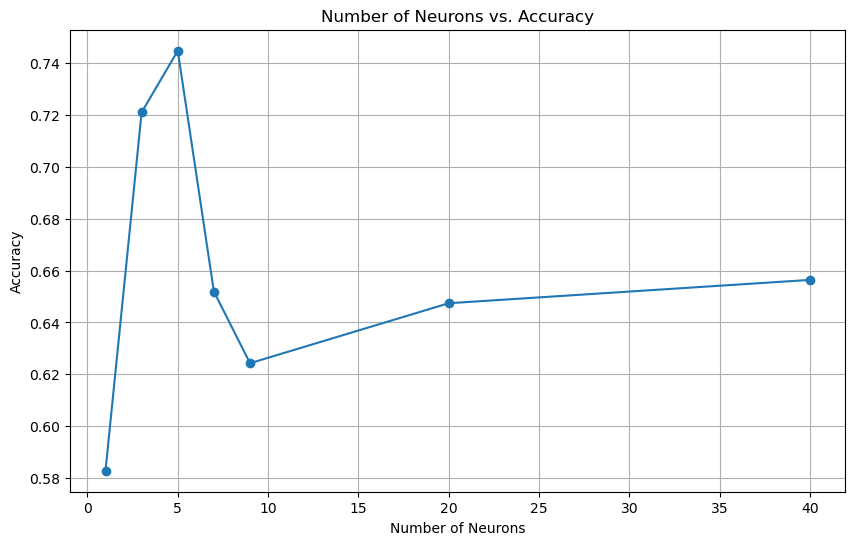

In [274]:
neuron_numbers = [1, 3, 5, 7, 9, 20, 40]
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Dummy data: replace with your actual data

accuracies = []

for neurons in neuron_numbers:
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=100, activation='relu', solver='adam', random_state=42)
    cv_scores = cross_val_score(mlp_classifier, x, y, cv=3, scoring='accuracy')
    accuracies.append(cv_scores.mean())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(neuron_numbers, accuracies, marker='o')
plt.title('Number of Neurons vs. Accuracy')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
